# Homework

Remember to load the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

The following dataset is a [well known dataset](https://www.kaggle.com/c/titanic) containing data on the passengers of the Titanic. Check out [this Kaggle page](https://www.kaggle.com/competitions/titanic/data) for more information on the variables contained in the dataset. Conveniently enough, a copy of this dataset can be loaded via the `seaborn` library.

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> Your task is to create a Logistic regression model that predicts which passengers survived the Titanic shipwreck.

The guidelines below will help you remember the necessary steps to reach your goal:

1. familiarise yourself with the data and explore both numeric and categorical variables that are available;
2. look at the predictors that are available and decide which you want to include in the model (*hint: categorical variables need to be converted to dummies first*); 
3. remember to check for the possibility of multicollinearity between the regressors (*hint: `.corr()` is your friend*);
4. once you're happy with your data, create a predictors matrix $X$ and a responce vector $y$ 
5. remember to split the data between training and test sets
6. use `statsmodels` or the `sklearn` library to fit a Logistic regression model to the training data; 
7. check out the regressioin coefficients (optional to print them to screen); 
8. take the model you just trained and use it on the test set (`X_test`) to produce a vector of predictions `y_pred`; 
9. check the performance of the model using the appropriate evaluation metrics.

In [3]:
# 1- familiarize wuth the data, explore numeric and categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.groupby(['survived', 'alive'], as_index=False).size()  #ok, nice

,survived,alive,size
0,0,no,549
1,1,yes,342


C:\Users\valentib\AppData\Local\Temp\ipykernel_2360\1485487744.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


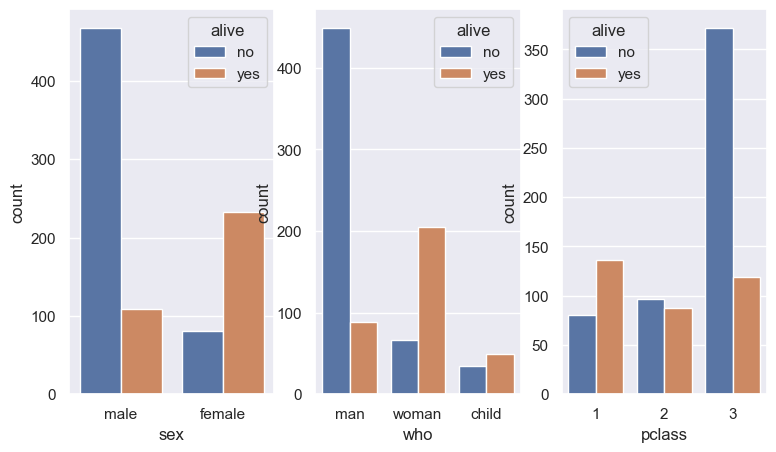

In [5]:
#women and children first

fig, ax =plt.subplots(1,3)
sns.countplot(data=df, x='sex', hue='alive',  ax=ax[0])
sns.countplot(data=df, x='who', hue='alive',ax=ax[1])
sns.countplot(data=df, x='pclass', hue='alive', ax=ax[2] )
fig.show()

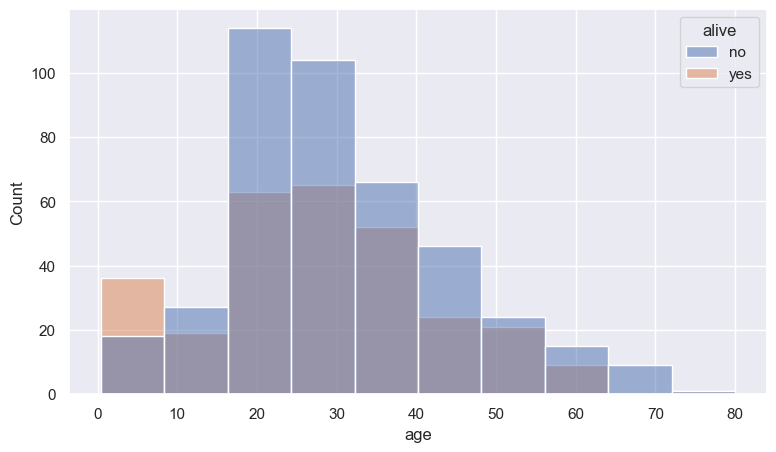

In [6]:
x = np.array(df['age'])
ax1 = sns.histplot(data=df, x="age",hue='alive', bins=10)

<AxesSubplot:xlabel='who', ylabel='age'>

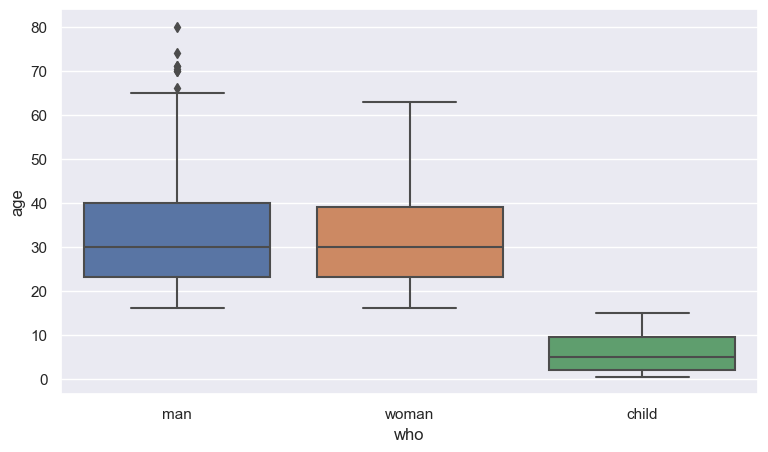

In [7]:
sns.boxplot(data=df, x="who",y="age")

In [8]:
#2- look at the predictors that are available and decide which you want to include in the model
#I want to include sex, who_child, pclass.

In [9]:
df2 = pd.get_dummies(df, columns=["who"])
df2 = pd.get_dummies(df2, columns=["pclass"])
df2 = pd.get_dummies(df2, columns=["sex"])
df2.head()

,survived,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,who_child,who_man,who_woman,pclass_1,pclass_2,pclass_3,sex_female,sex_male
0,0,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,0,1,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,0,0,1,1,0,0,1,0
2,1,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,0,1,0,0,0,1,0,1


In [10]:
#3- check for multicollinarity
df2[['survived','who_child', 'who_woman','pclass_1','pclass_3','sex_male']].corr()  #only correlation with the woman/males, seems nice.

,survived,who_child,who_woman,pclass_1,pclass_3,sex_male
survived,1.000000,0.136107,0.506562,0.285904,-0.322308,-0.543351
who_child,0.136107,1.000000,-0.211896,-0.127241,0.095193,-0.111141
who_woman,0.506562,-0.211896,1.000000,0.144043,-0.173333,-0.896214
pclass_1,0.285904,-0.127241,0.144043,1.000000,-0.626738,-0.098013
pclass_3,-0.322308,0.095193,-0.173333,-0.626738,1.000000,0.137143
sex_male,-0.543351,-0.111141,-0.896214,-0.098013,0.137143,1.000000


In [11]:
#4- once you're happy with your data, create a predictors matrix 𝑋 and a responce vector 𝑦
y = df2['survived']
X = df2[['who_child', 'who_woman','pclass_1','pclass_3','sex_male']]

In [12]:
#5- remember to split the data between training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#6- use statsmodels or the sklearn library to fit a Logistic regression model to the training data; 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#7- check out the regressioin coefficients (optional to print them to screen); 
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_[0])

Intercept: [-0.25849329]
Coefficients: [ 1.81479563  1.76289031  0.61222956 -1.20430724 -0.96079599]


In [14]:
#8- take the model you just trained and use it on the test set (X_test) to produce a vector of predictions y_pred
y_pred = log_reg.predict(X_test)

np.mean(y_pred==y_test)

0.8022388059701493

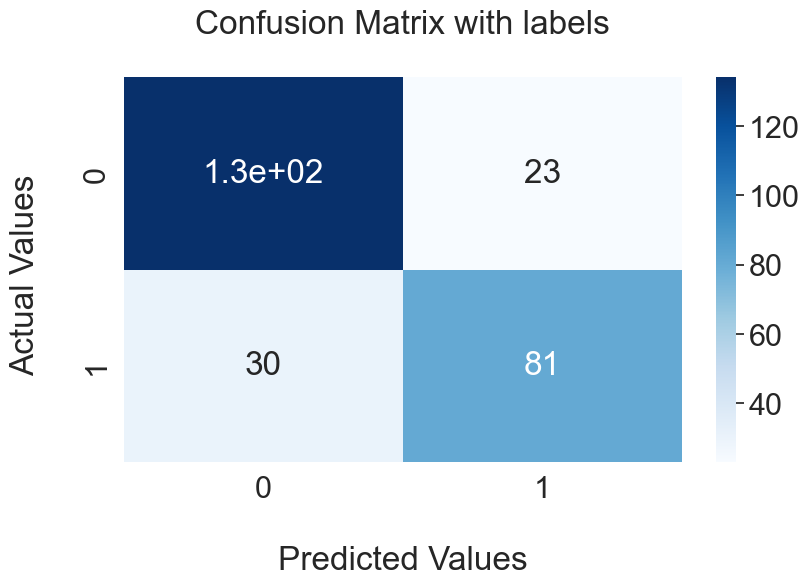

In [15]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)

# visualization of the Confusion Matrix
sns.set(font_scale=2)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');

ax.yaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()